In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /home/leotiv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/leotiv/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df = pd.read_csv('labeled.csv')

In [13]:
df.head(10)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
5,Для каких стан является эталоном современная с...,1.0
6,В шапке были ссылки на инфу по текущему фильму...,0.0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1.0
8,"Ебать тебя разносит, шизик.\n",1.0
9,"Обосрался, сиди обтекай\n",1.0


In [14]:
df.shape

(14412, 2)

In [16]:
df.info

<bound method DataFrame.info of                                                  comment  toxic
0                   Верблюдов-то за что? Дебилы, бл...\n    1.0
1      Хохлы, это отдушина затюканого россиянина, мол...    1.0
2                              Собаке - собачья смерть\n    1.0
3      Страницу обнови, дебил. Это тоже не оскорблени...    1.0
4      тебя не убедил 6-страничный пдф в том, что Скр...    1.0
...                                                  ...    ...
14407  Вонючий совковый скот прибежал и ноет. А вот и...    1.0
14408  А кого любить? Гоблина тупорылого что-ли? Или ...    1.0
14409  Посмотрел Утомленных солнцем 2. И оказалось, ч...    0.0
14410  КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...    1.0
14411  До сих пор пересматриваю его видео. Орамбо кст...    0.0

[14412 rows x 2 columns]>

In [17]:
df.dtypes

comment     object
toxic      float64
dtype: object

In [19]:
df['toxic'] = df['toxic'].apply(int)

In [20]:
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f471bc75d90>]],
      dtype=object)

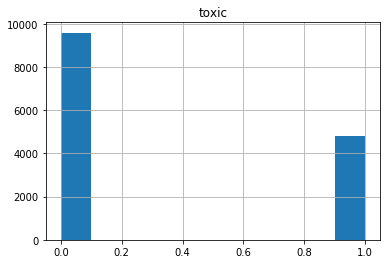

In [21]:
df.hist()

In [26]:
df['toxic'].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [27]:
for i in df[df['toxic']==0]['comment'].head(10):
    print(i)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [28]:
for i in df[df['toxic']==1]['comment'].head(10):
    print(i)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)

Для каких стан является эталоном современная система здравоохранения РФ? Для Зимбабве? Ты тупой? хохлы

УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РАЗВОРУЮТ КАК ВСЕГДА! УЖЕ ТРЕЩИНАМИ ПОШ Л! ТУПЫЕ КИТАЗЫ НЕ МОГУТ НИЧЕГО НОРМАЛЬНО СДЕЛАТЬ!

Ебать тебя разносит, шизик.

Обосрался, сиди обтекай

Зачем ты пишешь хуйню, дегенерат? Поцелуй в губы ! поцелую в засос.



In [33]:
train_df, test_df = train_test_split(df, test_size=0.3)

In [35]:
train_df['toxic'].value_counts()

0    6711
1    3377
Name: toxic, dtype: int64

In [36]:
test_df['toxic'].value_counts()

0    2875
1    1449
Name: toxic, dtype: int64

In [42]:
sen = df.iloc[1]['comment']
tokens = word_tokenize(sen, language="russian")
tokens_without_punct = [i for i in tokens if i not in string.punctuation]
rus_stop_words = stopwords.words('russian')
tokens_without_punct_and_stopwords = [i for i in tokens_without_punct if i not in rus_stop_words]
snowball = SnowballStemmer(language='russian')
stemmed_tok = [snowball.stem(i) for i in tokens_without_punct_and_stopwords]

In [43]:
stemmed_tok

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [48]:
def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in rus_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [50]:
tokenize_sentence(df.iloc[5]['comment'],rus_stop_words)

['для',
 'как',
 'стан',
 'явля',
 'эталон',
 'современ',
 'систем',
 'здравоохранен',
 'рф',
 'для',
 'зимбабв',
 'ты',
 'туп',
 'хохл']

In [51]:
vector = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [53]:
features = vector.fit_transform(train_df['comment'])

In [56]:
model = LogisticRegression(random_state=42)

In [57]:
model.fit(features,train_df['toxic'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
model.predict(features[0])

array([0])

In [74]:
model_pipiline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ('model', LogisticRegression(random_state=42))
])

In [75]:
model_pipiline.fit(train_df['comment'], train_df['toxic'])

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x7f4718667290>,
                                 use_idf=True, vocabulary=None)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [87]:
model_pipiline.predict(['пожалуйста пожалуйста пожалуйста пожалуйста пожалуйста пожалуйста пожалуйста пожалуйстапожалуйста пожалуйста блять блять блять блять '])

array([0])

In [81]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipiline.predict(test_df['comment']))

0.9078812691914022

In [88]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipiline.predict(test_df['comment']))

0.6121463077984817

In [90]:
prec, rec, tresh = precision_recall_curve(y_true=test_df['toxic'], probas_pred=model_pipiline.predict_proba(test_df['comment'])[:,1])

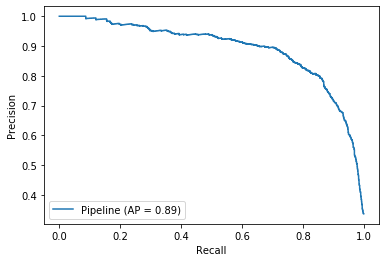

In [91]:
plot_precision_recall_curve(estimator=model_pipiline, X=test_df['comment'], y=test_df['toxic'])

In [92]:
np.where(prec>0.95)

(array([3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744,
        3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755,
        3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766,
        3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777,
        3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788,
        3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799,
        3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821,
        3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832,
        3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843,
        3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854,
        3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865,
        3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876,
        3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887,
        3888, 3889, 3890, 3891, 3892, 

In [93]:
tresh[3734]

0.6487152955139764

In [97]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipiline.predict_proba(test_df['comment'])[:,1]>tresh[3734])

0.9504587155963303

In [98]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipiline.predict_proba(test_df['comment'])[:,1]>tresh[3734])

0.357487922705314

In [99]:
grid_pipiline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ('model',
     GridSearchCV(
     LogisticRegression(random_state=42),
         param_grid={'C':[0.1,1,10]},
         cv=3,
         verbose=4
     )
    )
])

In [100]:
grid_pipiline.fit(train_df['comment'], train_df['toxic'])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.673, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.674, total=   0.1s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ............................... C=0.1, score=0.673, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.821, total=   0.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] ................................. C=1, score=0.818, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.814, total=   0.2s
[CV] C=10 ............................................................


/home/leotiv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.858, total=   0.4s
[CV] C=10 ............................................................


/home/leotiv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.858, total=   0.4s
[CV] C=10 ............................................................


/home/leotiv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.0s finished


[CV] ................................ C=10, score=0.857, total=   0.4s


/home/leotiv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scali

In [101]:
model_pipilineC10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ('model', LogisticRegression(random_state=42,C=10))
])

In [102]:
model_pipilineC10.fit(train_df['comment'], train_df['toxic'])

/home/leotiv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x7f47163abf80>,
                                 use_idf=True, vocabulary=None)),
                ('model',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit

In [104]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipilineC10.predict(test_df['comment']))

0.8767693588676103

In [105]:
prec, rec, tresh = precision_recall_curve(y_true=test_df['toxic'], probas_pred=model_pipilineC10.predict_proba(test_df['comment'])[:,1])

In [106]:
np.where(prec>0.95)

(array([3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696,
        3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707,
        3708, 3709, 3710, 3711, 3712, 3730, 3731, 3732, 3733, 3734, 3735,
        3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746,
        3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757,
        3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768,
        3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779,
        3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790,
        3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801,
        3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812,
        3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823,
        3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834,
        3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845,
        3846, 3847, 3848, 3849, 3850, 

In [107]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipilineC10.predict_proba(test_df['comment'])[:,1]>tresh[3686])

0.9505119453924915

In [108]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipilineC10.predict_proba(test_df['comment'])[:,1]>tresh[3686])

0.38440303657694963